In [ ]:
#Meet Vora
#Nirma University

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [16]:
#if the data is in zip form
'''import os
import zipfile
path = 'C:/Users/MEET VORA/Desktop/Pneumonia.zip'

zip_ref = zipfile.ZipFile(path, 'r')

zip_ref.extractall()
zip_ref.close()'''

"import os\nimport zipfile\npath = 'C:/Users/MEET VORA/Desktop/Pneumonia.zip'\n\nzip_ref = zipfile.ZipFile(path, 'r')\n\nzip_ref.extractall()\nzip_ref.close()"

In [35]:
labels = [ 'NORMAL','PNEUMONIA']
img_size = 150  #reducing img_size to increase computation 

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label) #eg chest_xray/chest_xray/train/ + 'PNEUMONIA'
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))     # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [36]:
path = 'C:/Users/MEET VORA/Desktop/'
train = get_data(path + 'chest_xray/chest_xray/train')
test = get_data(path + 'chest_xray/chest_xray/test')
val = get_data(path + 'chest_xray/chest_xray/val')

In [44]:
print("The number of NORMAL images in train directory : ",len(os.listdir(path + 'chest_xray/chest_xray/train/NORMAL')))
print("The number of PNEUMONIA images in train directory : ",len(os.listdir(path + 'chest_xray/chest_xray/train/PNEUMONIA')))

print("\nThe number of NORMAL images in test directory : ",len(os.listdir(path + 'chest_xray/chest_xray/test/NORMAL')))
print("The number of PNEUMONIA images in test directory : ",len(os.listdir(path + 'chest_xray/chest_xray/test/PNEUMONIA')))

print("\nThe number of NORMAL images in valid directory : ",len(os.listdir(path + 'chest_xray/chest_xray/val/NORMAL')))
print("The number of PNEUMONIA images in valid directory : ",len(os.listdir(path + 'chest_xray/chest_xray/val/PNEUMONIA')))

The number of NORMAL images in train directory :  1341
The number of PNEUMONIA images in train directory :  3875

The number of NORMAL images in test directory :  234
The number of PNEUMONIA images in test directory :  390

The number of NORMAL images in valid directory :  8
The number of PNEUMONIA images in valid directory :  8


In [38]:
#column 1 represents data and column 2 represents labels

print("Shape of images and label in train : ",train.shape) # 5216 = 1341 (normal) + 3875 (pneumonia) 
print("Shape of images and label in train : ",test.shape)
print("Shape of images and label in train : ",val.shape)

Shape of images and label in train :  (5216, 2)
Shape of images and label in train :  (624, 2)
Shape of images and label in train :  (16, 2)


**PNEUMONIA CASES**

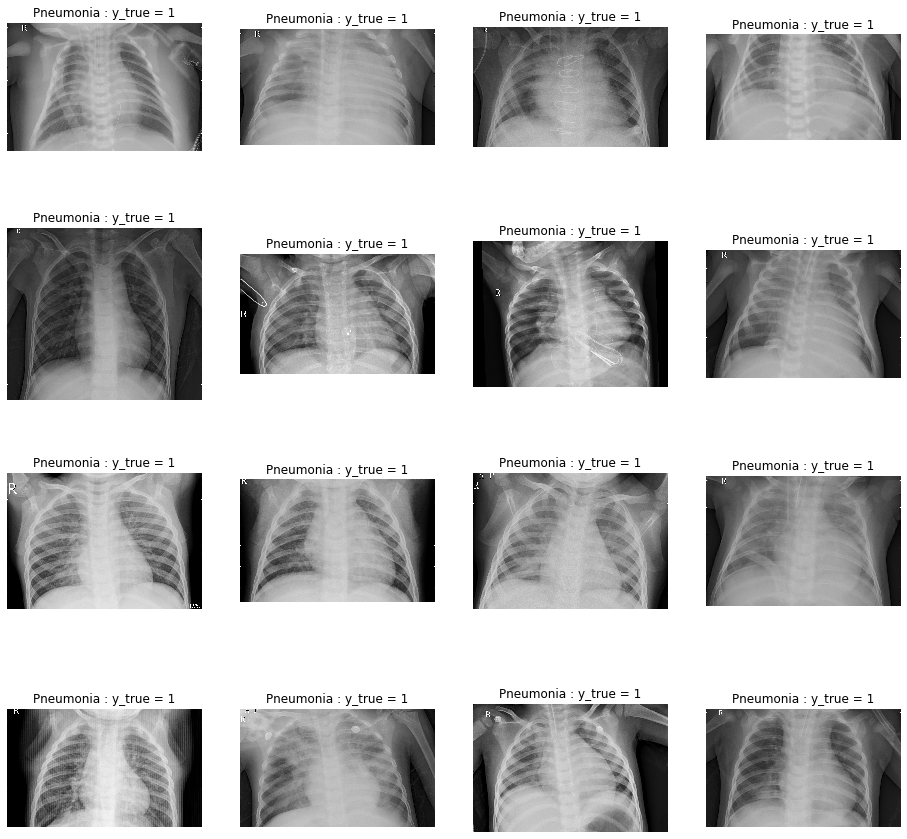

In [39]:
#visulization of images with correct labels
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random 

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

path_img = path + 'chest_xray/chest_xray/train/PNEUMONIA'


files = os.listdir(path_img)
rand_images = random.sample(files,nrows*ncols) #taking random images from dataset of 50k images

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)


for i in range(len(rand_images)):
    sp = plt.subplot(nrows, ncols, i + 1)
    plt.title("Pneumonia : y_true = 1")
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(path_img + '/' + rand_images[i])
    plt.imshow(img,cmap='gray')
    
plt.show()

**NORMAL CASES**

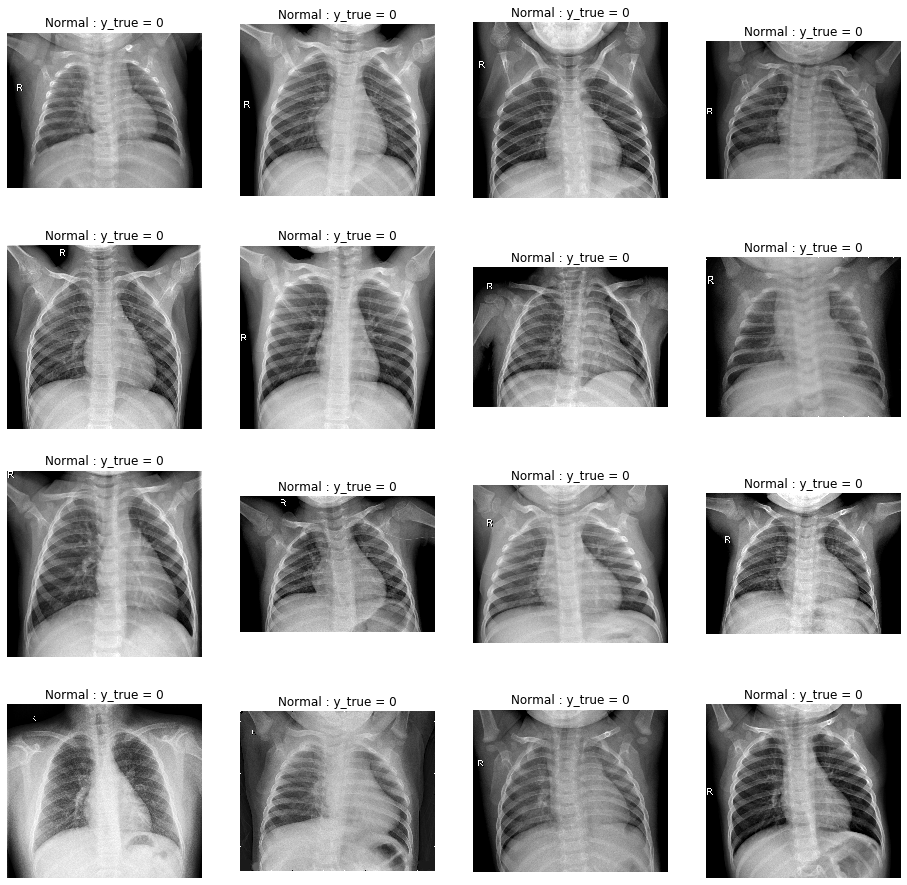

In [42]:
#visulization of images with correct labels
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random 

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

path_img = path + 'chest_xray/chest_xray/train/NORMAL'


files = os.listdir(path_img)
rand_images = random.sample(files,nrows*ncols) #taking random images from dataset of 50k images

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)


for i in range(len(rand_images)):
    sp = plt.subplot(nrows, ncols, i + 1)
    plt.title("Normal : y_true = 0")
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(path_img + '/' + rand_images[i])
    plt.imshow(img,cmap='gray')
    
plt.show()

**Data Observation**

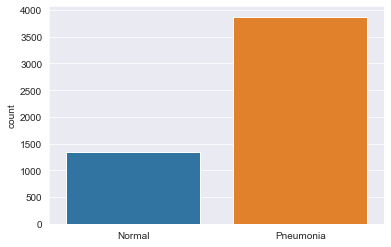

In [48]:
#we see that it is a case of data imbalance 
# as number of normal examples are less than cases having pneumonia

list1 = []
for i in train:
    if(i[1] == 1):
        list1.append("Pneumonia")
    else:
        list1.append("Normal")
sns.set_style('darkgrid')
sns.countplot(list1)

we will use data augmentation to avoid this situation

**Visualization of Normal and Pneumonia cases**

Text(0.5, 1.0, 'PNEUMONIA')

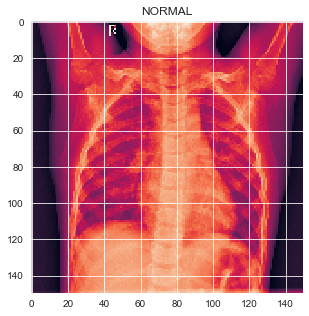

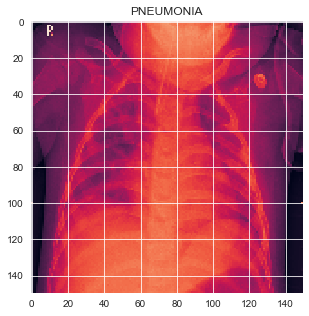

In [52]:

plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [53]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [54]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [56]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [57]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

In [58]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [59]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 477s 3s/step - loss: 0.6418 - accuracy: 0.8418 - val_loss: 19.0204 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 476s 3s/step - loss: 0.3099 - accuracy: 0.8903 - val_loss: 71.8028 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2277 - accuracy: 0.9158
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 582s 4s/step - loss: 0.2277 - accuracy: 0.9158 - val_loss: 7.1863 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 498s 3s/step - loss: 0.1560 - accuracy: 0.9477 - val_loss: 2.0884 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 697s 4s/step - loss: 0.1412 - accuracy: 0.9528 - val_loss: 2.6571 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 6/12
163/163 [=========================

In [60]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 27s 1s/step - loss: 0.2443 - accuracy: 0.9215
Loss of the model is -  0.24428440630435944
20/20 [==============================] - 25s 1s/step - loss: 0.2443 - accuracy: 0.9215
Accuracy of the model is -  92.14743375778198 %


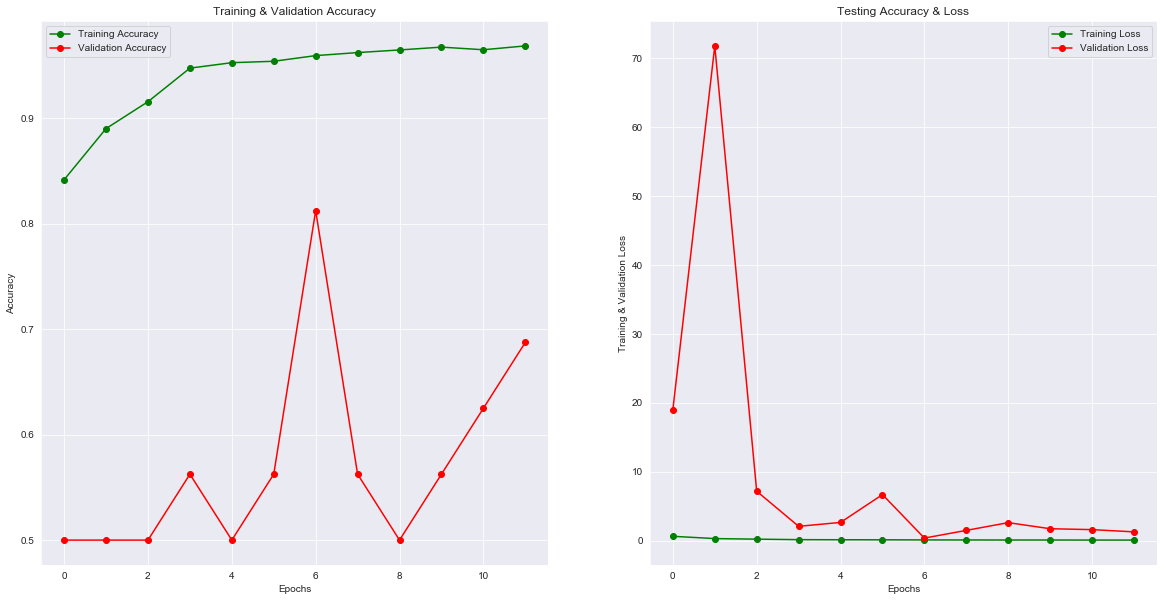

In [61]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [62]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])